In [1]:
from astropy.io import fits
from scipy import spatial as sp
import numpy as np
import matplotlib.pyplot as plt

load_z0DSage = fits.open('tao.1951.0.fits')
load_z1DSage = fits.open('tao.1959.0.fits')
load_z2DSage= fits.open('tao.1961.0.fits')
load_z3DSage = fits.open('tao.1957.0.fits')

data_z0DSage = load_z0DSage[1].data
data_z1DSage = load_z1DSage[1].data
data_z2DSage = load_z2DSage[1].data
data_z3DSage = load_z3DSage[1].data

In [2]:
# Dividing sample between centrals and satellites for DARK SAGE
idx_cen_z0DSage = np.where(data_z0DSage[:]['Galaxy_Classification'] == 0) [0]
idx_sat_z0DSage  = np.where(data_z0DSage[:]['Galaxy_Classification'] == 1) [0]
gal_cen_z0DSage = data_z0DSage[idx_cen_z0DSage]
gal_sat_z0DSage = data_z0DSage[idx_sat_z0DSage]

idx_cen_z1DSage = np.where(data_z1DSage[:]['Galaxy_Classification'] == 0) [0]
idx_sat_z1DSage  = np.where(data_z1DSage[:]['Galaxy_Classification'] == 1) [0]
gal_cen_z1DSage = data_z1DSage[idx_cen_z1DSage]
gal_sat_z1DSage = data_z1DSage[idx_sat_z1DSage]

idx_cen_z2DSage = np.where(data_z2DSage[:]['Galaxy_Classification'] == 0) [0]
idx_sat_z2DSage  = np.where(data_z2DSage[:]['Galaxy_Classification'] == 1) [0]
gal_cen_z2DSage = data_z2DSage[idx_cen_z2DSage]
gal_sat_z2DSage = data_z2DSage[idx_sat_z2DSage]

idx_cen_z3DSage = np.where(data_z3DSage[:]['Galaxy_Classification'] == 0) [0]
idx_sat_z3DSage  = np.where(data_z3DSage[:]['Galaxy_Classification'] == 1) [0]
gal_cen_z3DSage = data_z3DSage[idx_cen_z3DSage]
gal_sat_z3DSage = data_z3DSage[idx_sat_z3DSage]


In [3]:
#### Taking all galaxies with TSM = 0 out of sample
TSM_idx_cen_z0DSage = np.where(gal_cen_z0DSage[:]['Total_Stellar_Mass']!=0)[0]
gal_cen_z0DSage = gal_cen_z0DSage[TSM_idx_cen_z0DSage]

TSM_idx_cen_z1DSage = np.where(gal_cen_z1DSage[:]['Total_Stellar_Mass']!=0)[0]
gal_cen_z1DSage = gal_cen_z1DSage[TSM_idx_cen_z1DSage]

TSM_idx_cen_z2DSage = np.where(gal_cen_z2DSage[:]['Total_Stellar_Mass']!=0)[0]
gal_cen_z2DSage = gal_cen_z2DSage[TSM_idx_cen_z2DSage]

TSM_idx_cen_z3DSage = np.where(gal_cen_z3DSage[:]['Total_Stellar_Mass']!=0)[0]
gal_cen_z3DSage = gal_cen_z3DSage[TSM_idx_cen_z3DSage]


#### Taking all galaxies with DSM = 0 out of sample
DSM_idx_cen_z0DSage = np.where(gal_cen_z0DSage[:]['Disk_Stellar_Mass']!=0)[0]
gal_cen_z0DSage = gal_cen_z0DSage[DSM_idx_cen_z0DSage]

DSM_idx_cen_z1DSage = np.where(gal_cen_z1DSage[:]['Disk_Stellar_Mass']!=0)[0]
gal_cen_z1DSage = gal_cen_z1DSage[DSM_idx_cen_z1DSage]

DSM_idx_cen_z2DSage = np.where(gal_cen_z2DSage[:]['Disk_Stellar_Mass']!=0)[0]
gal_cen_z2DSage = gal_cen_z2DSage[DSM_idx_cen_z2DSage]

DSM_idx_cen_z3DSage = np.where(gal_cen_z3DSage[:]['Disk_Stellar_Mass']!=0)[0]
gal_cen_z3DSage = gal_cen_z3DSage[DSM_idx_cen_z3DSage]


In [4]:
morph_cen_z0DSage = gal_cen_z0DSage['Disk_Stellar_Mass']/gal_cen_z0DSage['Total_Stellar_Mass']
morph_cen_z1DSage = gal_cen_z1DSage['Disk_Stellar_Mass']/gal_cen_z1DSage['Total_Stellar_Mass']
morph_cen_z2DSage = gal_cen_z2DSage['Disk_Stellar_Mass']/gal_cen_z2DSage['Total_Stellar_Mass']
morph_cen_z3DSage = gal_cen_z3DSage['Disk_Stellar_Mass']/gal_cen_z3DSage['Total_Stellar_Mass']

###### Redshift 0
bulgedom_idx_cen_z0DSage = np.where(morph_cen_z0DSage < 0.5)[0]
bulgedom_cen_z0DSage = gal_cen_z0DSage[bulgedom_idx_cen_z0DSage]

diskdom_idx_cen_z0DSage = np.where(morph_cen_z0DSage > 0.5)[0]
diskdom_cen_z0DSage = gal_cen_z0DSage[diskdom_idx_cen_z0DSage]

###### Redshift 1
bulgedom_idx_cen_z1DSage = np.where(morph_cen_z1DSage < 0.5)[0]
bulgedom_cen_z1DSage = gal_cen_z1DSage[bulgedom_idx_cen_z1DSage]

diskdom_idx_cen_z1DSage = np.where(morph_cen_z1DSage > 0.5)[0]
diskdom_cen_z1DSage = gal_cen_z1DSage[diskdom_idx_cen_z1DSage]

###### Redshift 2
bulgedom_idx_cen_z2DSage = np.where(morph_cen_z2DSage < 0.5)[0]
bulgedom_cen_z2DSage = gal_cen_z2DSage[bulgedom_idx_cen_z2DSage]

diskdom_idx_cen_z2DSage = np.where(morph_cen_z2DSage > 0.5)[0]
diskdom_cen_z2DSage = gal_cen_z2DSage[diskdom_idx_cen_z2DSage]

###### Redshift 3
bulgedom_idx_cen_z3DSage = np.where(morph_cen_z3DSage < 0.5)[0]
bulgedom_cen_z3DSage = gal_cen_z3DSage[bulgedom_idx_cen_z3DSage]

diskdom_idx_cen_z3DSage = np.where(morph_cen_z3DSage > 0.5)[0]
diskdom_cen_z3DSage = gal_cen_z3DSage[diskdom_idx_cen_z3DSage]

In [5]:
bulgedom_cen_DSage = {}
bulge_gal_cen_DSage = [bulgedom_cen_z0DSage, bulgedom_cen_z1DSage, bulgedom_cen_z2DSage, bulgedom_cen_z3DSage]
i=0
for i in range(len(bulge_gal_cen_DSage)):
    
    bulgedom_cen_DSage["Mvir_z{0}".format(i)] = 1e10*bulge_gal_cen_DSage[i]['Mvir']
    bulgedom_cen_DSage["TSM_z{0}".format(i)] = 1e10*bulge_gal_cen_DSage[i]['Total_Stellar_Mass']    
    bulgedom_cen_DSage["CGMvir_z{0}".format(i)] = 1e10*bulge_gal_cen_DSage[i]['Central_Galaxy_Mvir']
    bulgedom_cen_DSage["bulgepseudo_z{0}".format(i)] = 1e10*bulge_gal_cen_DSage[i]['Pseudobulge_Mass']
    bulgedom_cen_DSage["DSM_z{0}".format(i)] = 1e10*bulge_gal_cen_DSage[i]['Disk_Stellar_Mass']
    bulgedom_cen_DSage["ColdGM_z{0}".format(i)] = 1e10*bulge_gal_cen_DSage[i]['Cold_Gas_Mass']    
    bulgedom_cen_DSage["HotGM_z{0}".format(i)] = 1e10*bulge_gal_cen_DSage[i]['Hot_Gas_Mass']
    bulgedom_cen_DSage["EjectedGM_z{0}".format(i)] = 1e10*bulge_gal_cen_DSage[i]['Ejected_Gas_Mass']     
    bulgedom_cen_DSage["Vvir_z{0}".format(i)] = bulge_gal_cen_DSage[i]['Vvir']
    bulgedom_cen_DSage["Rvir_z{0}".format(i)] = bulge_gal_cen_DSage[i]['Rvir']    
    bulgedom_cen_DSage["xpos_z{0}".format(i)] = bulge_gal_cen_DSage[i]['X']
    bulgedom_cen_DSage["ypos_z{0}".format(i)] = bulge_gal_cen_DSage[i]['Y']
    bulgedom_cen_DSage["zpos_z{0}".format(i)] = bulge_gal_cen_DSage[i]['Z']
    bulgedom_cen_DSage["xvel_z{0}".format(i)] = bulge_gal_cen_DSage[i]['X_Velocity']
    bulgedom_cen_DSage["yvel_z{0}".format(i)] = bulge_gal_cen_DSage[i]['Y_Velocity']
    bulgedom_cen_DSage["zvel_z{0}".format(i)] = bulge_gal_cen_DSage[i]['Z_Velocity']
    bulgedom_cen_DSage["xSDspin_z{0}".format(i)] = bulge_gal_cen_DSage[i]['X_Spin_of_Stellar_Disk']
    bulgedom_cen_DSage["ySDspin_z{0}".format(i)] = bulge_gal_cen_DSage[i]['Y_Spin_of_Stellar_Disk']
    bulgedom_cen_DSage["zSDspin_z{0}".format(i)] = bulge_gal_cen_DSage[i]['Z_Spin_of_Stellar_Disk']
    bulgedom_cen_DSage["xGDspin_z{0}".format(i)] = bulge_gal_cen_DSage[i]['X_Spin_of_Gas_Disk']
    bulgedom_cen_DSage["yGDspin_z{0}".format(i)] = bulge_gal_cen_DSage[i]['Y_Spin_of_Gas_Disk']
    bulgedom_cen_DSage["zGDspin_z{0}".format(i)] = bulge_gal_cen_DSage[i]['Z_Spin_of_Gas_Disk']
    bulgedom_cen_DSage["xhaloJ_z{0}".format(i)] = bulge_gal_cen_DSage[i]['jX_Halo']
    bulgedom_cen_DSage["yhaloJ_z{0}".format(i)] = bulge_gal_cen_DSage[i]['jY_Halo']
    bulgedom_cen_DSage["zhaloJ_z{0}".format(i)] = bulge_gal_cen_DSage[i]['jZ_Halo']      
    #bulgedom_cen_DSage["NgalcountsR8_z{0}".format(i)] = bulge_gal_cen_DSage[i]['Ngal_counts_R8']   
    bulgedom_cen_DSage["JSD_z{0}".format(i)] = bulge_gal_cen_DSage[i]['j_Stellar_Disk']
    
    bulgedom_cen_DSage["pos_z{0}".format(i)] = np.sqrt(bulgedom_cen_DSage['xpos_z{0}'.format(i)]**2 + 
                                                    bulgedom_cen_DSage['ypos_z{0}'.format(i)]**2 + 
                                                    bulgedom_cen_DSage['zpos_z{0}'.format(i)]**2)
    
    bulgedom_cen_DSage["vel_z{0}".format(i)] = np.sqrt(bulgedom_cen_DSage['xvel_z{0}'.format(i)]**2 + 
                                                    bulgedom_cen_DSage['yvel_z{0}'.format(i)]**2 + 
                                                    bulgedom_cen_DSage['zvel_z{0}'.format(i)]**2)
    
    bulgedom_cen_DSage["SDspin_z{0}".format(i)] = np.sqrt(bulgedom_cen_DSage['xSDspin_z{0}'.format(i)]**2 + 
                                                    bulgedom_cen_DSage['ySDspin_z{0}'.format(i)]**2 + 
                                                    bulgedom_cen_DSage['zSDspin_z{0}'.format(i)]**2)
    
    bulgedom_cen_DSage["GDspin_z{0}".format(i)] = np.sqrt(bulgedom_cen_DSage['xGDspin_z{0}'.format(i)]**2 + 
                                                    bulgedom_cen_DSage['yGDspin_z{0}'.format(i)]**2 + 
                                                    bulgedom_cen_DSage['zGDspin_z{0}'.format(i)]**2)
    
    
    bulgedom_cen_DSage["haloJ_z{0}".format(i)] = np.sqrt(bulgedom_cen_DSage['xhaloJ_z{0}'.format(i)]**2 + 
                                                    bulgedom_cen_DSage['yhaloJ_z{0}'.format(i)]**2 + 
                                                    bulgedom_cen_DSage['zhaloJ_z{0}'.format(i)]**2) 
  

    bulgedom_cen_DSage["points_z{0}".format(i)] = np.array(zip(bulgedom_cen_DSage["xpos_z{0}".format(i)].ravel(),
                                                     bulgedom_cen_DSage["ypos_z{0}".format(i)].ravel(),
                                                     bulgedom_cen_DSage["zpos_z{0}".format(i)].ravel()))

   


In [6]:
diskdom_cen_DSage = {}
ii=0
disk_gal_cen_DSage = [diskdom_cen_z0DSage, diskdom_cen_z1DSage, diskdom_cen_z2DSage, diskdom_cen_z3DSage]
for ii in range(len(disk_gal_cen_DSage)):
    diskdom_cen_DSage["Mvir_z{0}".format(ii)] = 1e10*disk_gal_cen_DSage[ii]['Mvir']
    diskdom_cen_DSage["TSM_z{0}".format(ii)] = 1e10*disk_gal_cen_DSage[ii]['Total_Stellar_Mass']
    diskdom_cen_DSage["CGMvir_z{0}".format(ii)] = 1e10*disk_gal_cen_DSage[ii]['Central_Galaxy_Mvir']
    diskdom_cen_DSage["bulgepseudo_z{0}".format(ii)] = 1e10*disk_gal_cen_DSage[ii]['Pseudobulge_Mass']
    diskdom_cen_DSage["DSM_z{0}".format(ii)] = 1e10*disk_gal_cen_DSage[ii]['Disk_Stellar_Mass'] 
    diskdom_cen_DSage["ColdGM_z{0}".format(i)] = 1e10*disk_gal_cen_DSage[i]['Cold_Gas_Mass']    
    diskdom_cen_DSage["HotGM_z{0}".format(i)] = 1e10*disk_gal_cen_DSage[i]['Hot_Gas_Mass']
    diskdom_cen_DSage["EjectedGM_z{0}".format(i)] = 1e10*disk_gal_cen_DSage[i]['Ejected_Gas_Mass']       
    diskdom_cen_DSage["Vvir_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['Vvir']
    diskdom_cen_DSage["Rvir_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['Rvir']    
    diskdom_cen_DSage["xpos_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['X']
    diskdom_cen_DSage["ypos_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['Y']
    diskdom_cen_DSage["zpos_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['Z']
    diskdom_cen_DSage["xvel_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['X_Velocity']
    diskdom_cen_DSage["yvel_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['Y_Velocity']
    diskdom_cen_DSage["zvel_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['Z_Velocity']
    diskdom_cen_DSage["xSDspin_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['X_Spin_of_Stellar_Disk']
    diskdom_cen_DSage["ySDspin_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['Y_Spin_of_Stellar_Disk']
    diskdom_cen_DSage["zSDspin_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['Z_Spin_of_Stellar_Disk']
    diskdom_cen_DSage["xGDspin_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['X_Spin_of_Gas_Disk']
    diskdom_cen_DSage["yGDspin_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['Y_Spin_of_Gas_Disk']
    diskdom_cen_DSage["zGDspin_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['Z_Spin_of_Gas_Disk']
    diskdom_cen_DSage["xhaloJ_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['jX_Halo']
    diskdom_cen_DSage["yhaloJ_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['jY_Halo']
    diskdom_cen_DSage["zhaloJ_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['jZ_Halo']  
    #diskdom_cen_DSage["NgalcountsR8_z{0}".format(i)] = disk_gal_cen_DSage[i]['Ngal_counts_R8'] 
    diskdom_cen_DSage["JSD_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['j_Stellar_Disk']
 


    diskdom_cen_DSage["pos_z{0}".format(ii)] = np.sqrt(diskdom_cen_DSage['xpos_z{0}'.format(ii)]**2 + 
                                                    diskdom_cen_DSage['ypos_z{0}'.format(ii)]**2 + 
                                                    diskdom_cen_DSage['zpos_z{0}'.format(ii)]**2)
    
    diskdom_cen_DSage["vel_z{0}".format(ii)] = np.sqrt(diskdom_cen_DSage['xvel_z{0}'.format(ii)]**2 + 
                                                    diskdom_cen_DSage['yvel_z{0}'.format(ii)]**2 + 
                                                    diskdom_cen_DSage['zvel_z{0}'.format(ii)]**2)

    
    diskdom_cen_DSage["SDspin_z{0}".format(ii)] = np.sqrt(diskdom_cen_DSage['xSDspin_z{0}'.format(ii)]**2 + 
                                                    diskdom_cen_DSage['ySDspin_z{0}'.format(ii)]**2 + 
                                                    diskdom_cen_DSage['zSDspin_z{0}'.format(ii)]**2)
    
    diskdom_cen_DSage["GDspin_z{0}".format(ii)] = np.sqrt(diskdom_cen_DSage['xGDspin_z{0}'.format(ii)]**2 + 
                                                    diskdom_cen_DSage['yGDspin_z{0}'.format(ii)]**2 + 
                                                    diskdom_cen_DSage['zGDspin_z{0}'.format(ii)]**2)
    
    
    diskdom_cen_DSage["haloJ_z{0}".format(ii)] = np.sqrt(diskdom_cen_DSage['xhaloJ_z{0}'.format(ii)]**2 + 
                                                    diskdom_cen_DSage['yhaloJ_z{0}'.format(ii)]**2 + 
                                                    diskdom_cen_DSage['zhaloJ_z{0}'.format(ii)]**2)   
    
    diskdom_cen_DSage["points_z{0}".format(ii)] = np.array(zip(diskdom_cen_DSage["xpos_z{0}".format(ii)].ravel(),
                                                     diskdom_cen_DSage["ypos_z{0}".format(ii)].ravel(),
                                                     diskdom_cen_DSage["zpos_z{0}".format(ii)].ravel()))
    
    diskdom_cen_DSage["tree_z{0}".format(ii)] = sp.cKDTree(diskdom_cen_DSage["points_z{0}".format(ii)])

    diskdom_cen_DSage["ck_arr_10_z{0}".format(ii)] = diskdom_cen_DSage["tree_z{0}".format(ii)].query_ball_point(diskdom_cen_DSage["points_z{0}".format(ii)], 8)

    iii=0
    diskdom_cen_DSage["ngal_arr_10_z{0}".format(ii)] = np.array([len(diskdom_cen_DSage["ck_arr_10_z{0}".format(ii)][iii])-1 for iii in range(len(diskdom_cen_DSage["ck_arr_10_z{0}".format(ii)]))]).astype(float)

   

# Binning stellar mass

In [7]:
##################################### BULGE MASS #################################
bulgemassbin_cen_DSage = {}
i=0
    
for i in range(len(bulge_gal_cen_DSage)):
    bulgemassbin_cen_DSage["bulge_idx_z{0}_SM7_8".format(i)] = np.where(np.logical_and(bulgedom_cen_DSage["TSM_z{0}".format(i)] >= 1e7, 
                                                                                     bulgedom_cen_DSage["TSM_z{0}".format(i)] <= 1e8))[0]
    
    bulgemassbin_cen_DSage["bulge_idx_z{0}_SM8_9".format(i)] = np.where(np.logical_and(bulgedom_cen_DSage["TSM_z{0}".format(i)] > 1e8, 
                                                                                     bulgedom_cen_DSage["TSM_z{0}".format(i)] <= 1e9))[0]
    
    bulgemassbin_cen_DSage["bulge_idx_z{0}_SM9_10".format(i)] = np.where(np.logical_and(bulgedom_cen_DSage["TSM_z{0}".format(i)] > 1e9, 
                                                                                     bulgedom_cen_DSage["TSM_z{0}".format(i)] <= 1e10))[0]
    
    bulgemassbin_cen_DSage["bulge_idx_z{0}_SM10_11".format(i)] = np.where(np.logical_and(bulgedom_cen_DSage["TSM_z{0}".format(i)] > 1e10, 
                                                                                     bulgedom_cen_DSage["TSM_z{0}".format(i)] <= 1e11))[0] 
   
    bulgemassbin_cen_DSage["bulge_idx_z{0}_SM11_12".format(i)] = np.where(np.logical_and(bulgedom_cen_DSage["TSM_z{0}".format(i)] > 1e11, 
                                                                                     bulgedom_cen_DSage["TSM_z{0}".format(i)] <= 1e12))[0]

    
    bulgemassbin_cen_DSage["bulgedom_z{0}_SM7_8".format(i)] = bulge_gal_cen_DSage[i][bulgemassbin_cen_DSage["bulge_idx_z{0}_SM7_8".format(i)]]
    bulgemassbin_cen_DSage["bulgedom_z{0}_SM8_9".format(i)] = bulge_gal_cen_DSage[i][bulgemassbin_cen_DSage["bulge_idx_z{0}_SM8_9".format(i)]]
    bulgemassbin_cen_DSage["bulgedom_z{0}_SM9_10".format(i)] = bulge_gal_cen_DSage[i][bulgemassbin_cen_DSage["bulge_idx_z{0}_SM9_10".format(i)]]
    bulgemassbin_cen_DSage["bulgedom_z{0}_SM10_11".format(i)] = bulge_gal_cen_DSage[i][bulgemassbin_cen_DSage["bulge_idx_z{0}_SM10_11".format(i)]]  
    bulgemassbin_cen_DSage["bulgedom_z{0}_SM11_12".format(i)] = bulge_gal_cen_DSage[i][bulgemassbin_cen_DSage["bulge_idx_z{0}_SM11_12".format(i)]]


In [8]:
################################################ DISK MASS ####################################################
diskmassbin_cen_DSage = {}
i=0
    
for i in range(len(disk_gal_cen_DSage)):
    diskmassbin_cen_DSage["disk_idx_z{0}_SM7_8".format(i)] = np.where(np.logical_and(diskdom_cen_DSage["TSM_z{0}".format(i)] >= 1e7, 
                                                                                     diskdom_cen_DSage["TSM_z{0}".format(i)] <= 1e8))[0]
    
    diskmassbin_cen_DSage["disk_idx_z{0}_SM8_9".format(i)] = np.where(np.logical_and(diskdom_cen_DSage["TSM_z{0}".format(i)] > 1e8, 
                                                                                     diskdom_cen_DSage["TSM_z{0}".format(i)] <= 1e9))[0]
    
    diskmassbin_cen_DSage["disk_idx_z{0}_SM9_10".format(i)] = np.where(np.logical_and(diskdom_cen_DSage["TSM_z{0}".format(i)] > 1e9, 
                                                                                     diskdom_cen_DSage["TSM_z{0}".format(i)] <= 1e10))[0]
    
    diskmassbin_cen_DSage["disk_idx_z{0}_SM10_11".format(i)] = np.where(np.logical_and(diskdom_cen_DSage["TSM_z{0}".format(i)] > 1e10, 
                                                                                     diskdom_cen_DSage["TSM_z{0}".format(i)] <= 1e11))[0]
                                                                                   
    
    diskmassbin_cen_DSage["disk_idx_z{0}_SM11_12".format(i)] = np.where(np.logical_and(diskdom_cen_DSage["TSM_z{0}".format(i)] > 1e11, 
                                                                                     diskdom_cen_DSage["TSM_z{0}".format(i)] <= 1e12))[0]

    
    diskmassbin_cen_DSage["diskdom_z{0}_SM7_8".format(i)] = disk_gal_cen_DSage[i][diskmassbin_cen_DSage["disk_idx_z{0}_SM7_8".format(i)]]
    diskmassbin_cen_DSage["diskdom_z{0}_SM8_9".format(i)] = disk_gal_cen_DSage[i][diskmassbin_cen_DSage["disk_idx_z{0}_SM8_9".format(i)]]
    diskmassbin_cen_DSage["diskdom_z{0}_SM9_10".format(i)] = disk_gal_cen_DSage[i][diskmassbin_cen_DSage["disk_idx_z{0}_SM9_10".format(i)]]
    diskmassbin_cen_DSage["diskdom_z{0}_SM10_11".format(i)] = disk_gal_cen_DSage[i][diskmassbin_cen_DSage["disk_idx_z{0}_SM10_11".format(i)]] 
    diskmassbin_cen_DSage["diskdom_z{0}_SM11_12".format(i)] = disk_gal_cen_DSage[i][diskmassbin_cen_DSage["disk_idx_z{0}_SM11_12".format(i)]]





In [9]:
#bulge_gal_cen_DSage = [bulgedom_cen_z0DSage, bulgedom_cen_z1DSage, bulgedom_cen_z2DSage, bulgedom_cen_z3DSage]
i = 0
j = 0
for i in range(len(bulge_gal_cen_DSage)):
    for j in range(5):
        j = j+ 7
        bulgedom_cen_DSage["Mvir_z{0}_SM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Mvir']
        bulgedom_cen_DSage["TSM_z{0}_SM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Total_Stellar_Mass']
        bulgedom_cen_DSage["CGMvir_z{0}_SM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Central_Galaxy_Mvir']
        bulgedom_cen_DSage["bulgepseudo_z{0}_SM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Pseudobulge_Mass']
        bulgedom_cen_DSage["DSM_z{0}_SM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Disk_Stellar_Mass']            
        bulgedom_cen_DSage["Vvir_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Vvir']
        bulgedom_cen_DSage["Rvir_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Rvir']
        bulgedom_cen_DSage["xpos_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['X']
        bulgedom_cen_DSage["ypos_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Y']
        bulgedom_cen_DSage["zpos_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Z']
        bulgedom_cen_DSage["xvel_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['X_Velocity']
        bulgedom_cen_DSage["yvel_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Y_Velocity']
        bulgedom_cen_DSage["zvel_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Z_Velocity']
        bulgedom_cen_DSage["xSDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['X_Spin_of_Stellar_Disk']
        bulgedom_cen_DSage["ySDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Y_Spin_of_Stellar_Disk']
        bulgedom_cen_DSage["zSDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Z_Spin_of_Stellar_Disk']
        bulgedom_cen_DSage["xGDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['X_Spin_of_Gas_Disk']
        bulgedom_cen_DSage["yGDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Y_Spin_of_Gas_Disk']
        bulgedom_cen_DSage["zGDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Z_Spin_of_Gas_Disk']
        bulgedom_cen_DSage["xhaloJ_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['jX_Halo']
        bulgedom_cen_DSage["yhaloJ_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['jY_Halo']
        bulgedom_cen_DSage["zhaloJ_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['jZ_Halo']      
        #bulgedom_cen_DSage["NgalcountsR8_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Ngal_counts_R8']
        bulgedom_cen_DSage["totparicles_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Total_Particles']
    
        bulgedom_cen_DSage["JSD_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['j_Stellar_Disk']        
        
        
        bulgedom_cen_DSage["pos_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xpos_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['ypos_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zpos_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_DSage["vel_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xvel_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['yvel_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zvel_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_DSage["SDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xSDspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['ySDspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zSDspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_DSage["GDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xGDspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['yGDspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zGDspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_DSage["haloJ_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xhaloJ_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['yhaloJ_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zhaloJ_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2) 
    


In [10]:
#disk_gal_cen_DSage = [diskdom_cen_z0DSage, diskdom_cen_z1DSage, diskdom_cen_z2DSage, diskdom_cen_z3DSage]
i=0
j=0
for i in range(len(disk_gal_cen_DSage)):
    for j in range(5):
        j = j + 7
        diskdom_cen_DSage["Mvir_z{0}_SM{1}_{2}".format(i,j,j+1)] = 1e10*diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Mvir']
        diskdom_cen_DSage["TSM_z{0}_SM{1}_{2}".format(i,j,j+1)] = 1e10*diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Total_Stellar_Mass']
        diskdom_cen_DSage["CGMvir_z{0}_SM{1}_{2}".format(i,j,j+1)] = 1e10*diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Central_Galaxy_Mvir']
        diskdom_cen_DSage["bulgepseudo_z{0}_SM{1}_{2}".format(i,j,j+1)] = 1e10*diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Pseudobulge_Mass']
        diskdom_cen_DSage["DSM_z{0}_SM{1}_{2}".format(i,j,j+1)] = 1e10*diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Disk_Stellar_Mass']                    
        diskdom_cen_DSage["Vvir_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Vvir']
        diskdom_cen_DSage["Rvir_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Rvir']            
        diskdom_cen_DSage["xpos_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['X']
        diskdom_cen_DSage["ypos_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Y']
        diskdom_cen_DSage["zpos_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Z']
        diskdom_cen_DSage["xvel_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['X_Velocity']
        diskdom_cen_DSage["yvel_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Y_Velocity']
        diskdom_cen_DSage["zvel_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Z_Velocity']
        diskdom_cen_DSage["xSDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['X_Spin_of_Stellar_Disk']
        diskdom_cen_DSage["ySDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Y_Spin_of_Stellar_Disk']
        diskdom_cen_DSage["zSDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Z_Spin_of_Stellar_Disk']
        diskdom_cen_DSage["xGDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['X_Spin_of_Gas_Disk']
        diskdom_cen_DSage["yGDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Y_Spin_of_Gas_Disk']
        diskdom_cen_DSage["zGDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Z_Spin_of_Gas_Disk']
        diskdom_cen_DSage["xhaloJ_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['jX_Halo']
        diskdom_cen_DSage["yhaloJ_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['jY_Halo']
        diskdom_cen_DSage["zhaloJ_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['jZ_Halo']      
        #diskdom_cen_DSage["NgalcountsR8_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Ngal_counts_R8']    
        diskdom_cen_DSage["totparicles_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Total_Particles']    
        diskdom_cen_DSage["JSD_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['j_Stellar_Disk']        
        
        
        
        diskdom_cen_DSage["pos_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(diskdom_cen_DSage['xpos_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['ypos_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['zpos_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2)
    
        diskdom_cen_DSage["vel_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(diskdom_cen_DSage['xvel_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['yvel_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['zvel_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2)
    
        diskdom_cen_DSage["SDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(diskdom_cen_DSage['xSDspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['ySDspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['zSDspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2)
    
        diskdom_cen_DSage["GDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(diskdom_cen_DSage['xGDspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['yGDspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['zGDspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2)
    
        diskdom_cen_DSage["haloJ_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(diskdom_cen_DSage['xhaloJ_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['yhaloJ_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['zhaloJ_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2) 
    

    
    

# Disk lambda

In [11]:
i = 0
j = 0
for i in range(len(bulge_gal_cen_DSage)):
    for j in range(5):
        j = j + 7        
        bulgedom_cen_DSage["slambda_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgedom_cen_DSage["JSD_z{0}_SM{1}_{2}".format(i,j,j+1)]/(np.sqrt(2)*bulgedom_cen_DSage["Vvir_z{0}_SM{1}_{2}".format(i,j,j+1)]*
                                                                bulgedom_cen_DSage["Rvir_z{0}_SM{1}_{2}".format(i,j,j+1)])


n1 = 0
n2 = 0
for n1 in range(len(disk_gal_cen_DSage)):
    for n2 in range(5):
        n2 = n2 + 7
        diskdom_cen_DSage["slambda_z{0}_SM{1}_{2}".format(n1,n2,n2+1)] = diskdom_cen_DSage["JSD_z{0}_SM{1}_{2}".format(n1,n2,n2+1)]/(np.sqrt(2)*diskdom_cen_DSage["Vvir_z{0}_SM{1}_{2}".format(n1,n2,n2+1)]*
                                                                diskdom_cen_DSage["Rvir_z{0}_SM{1}_{2}".format(n1,n2,n2+1)])



In [17]:
########DSAGE#########    make a function that does the binning mean and std of the mean
failval = np.nan
# failval = -999
mean_func = np.nanmean
std_func = np.nanstd
Mvir_bins = np.linspace(0, 50, 12)

def meanbin(a, b):
    idx_Mvir = np.digitize(a, Mvir_bins)
    mean_a = np.array([ mean_func(a[idx_Mvir==ii]) if len(a[idx_Mvir==ii]) > 0 else failval for ii in range(1, len(Mvir_bins))])
    mean_b = np.array([ mean_func(b[idx_Mvir==ii]) if len(a[idx_Mvir==ii]) > 0 else failval for ii in range(1, len(Mvir_bins))])
    return mean_a, mean_b



def stdbin(a, b):
    idx_Mvir = np.digitize(a, Mvir_bins)
    std_a = np.array([ std_func(a[idx_Mvir==ii]) if len(a[idx_Mvir==ii]) > 0 else failval for ii in range(1, len(Mvir_bins))])
    std_b = np.array([ std_func(b[idx_Mvir==ii])/np.sqrt(len(b[idx_Mvir==ii])) if len(a[idx_Mvir==ii]) > 0 else failval for ii in range(1, len(Mvir_bins))])
    #/np.sqrt(len(b[idx_Mvir==ii]))
    return std_a, std_b

In [18]:
i = 0
j = 0
for i in range(len(bulge_gal_cen_DSage)):
    for j in range(4):
        j = j + 8 


        bulgedom_cen_DSage["points_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.array(zip(bulgedom_cen_DSage["xpos_z{0}_SM{1}_{2}".format(i,j,j+1)].ravel(), 
                                                                           bulgedom_cen_DSage["ypos_z{0}_SM{1}_{2}".format(i,j,j+1)].ravel(), 
                                                                           bulgedom_cen_DSage["zpos_z{0}_SM{1}_{2}".format(i,j,j+1)].ravel()))
        
        bulgedom_cen_DSage["tree_z{0}_SM{1}_{2}".format(i,j,j+1)] = sp.cKDTree(bulgedom_cen_DSage["points_z{0}_SM{1}_{2}".format(i,j,j+1)])


        bulgedom_cen_DSage["ck_arr_10_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgedom_cen_DSage["tree_z{0}_SM{1}_{2}".format(i,j,j+1)].query_ball_point(bulgedom_cen_DSage["points_z{0}_SM{1}_{2}".format(i,j,j+1)], 8)

        ii=0
        bulgedom_cen_DSage["ngal_arr_10_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.array([len(bulgedom_cen_DSage["ck_arr_10_z{0}_SM{1}_{2}".format(i,j,j+1)][ii])-1 for ii in range(len(bulgedom_cen_DSage["ck_arr_10_z{0}_SM{1}_{2}".format(i,j,j+1)]))]).astype(float)


In [19]:
i = 0
j = 0
for i in range(len(disk_gal_cen_DSage)):
    for j in range(4):
        j = j + 8 


        diskdom_cen_DSage["points_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.array(zip(diskdom_cen_DSage["xpos_z{0}_SM{1}_{2}".format(i,j,j+1)].ravel(), 
                                                                           diskdom_cen_DSage["ypos_z{0}_SM{1}_{2}".format(i,j,j+1)].ravel(), 
                                                                           diskdom_cen_DSage["zpos_z{0}_SM{1}_{2}".format(i,j,j+1)].ravel()))
        
        diskdom_cen_DSage["tree_z{0}_SM{1}_{2}".format(i,j,j+1)] = sp.cKDTree(diskdom_cen_DSage["points_z{0}_SM{1}_{2}".format(i,j,j+1)])


        diskdom_cen_DSage["ck_arr_10_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskdom_cen_DSage["tree_z{0}_SM{1}_{2}".format(i,j,j+1)].query_ball_point(diskdom_cen_DSage["points_z{0}_SM{1}_{2}".format(i,j,j+1)], 8)

        ii=0
        diskdom_cen_DSage["ngal_arr_10_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.array([len(diskdom_cen_DSage["ck_arr_10_z{0}_SM{1}_{2}".format(i,j,j+1)][ii])-1 for ii in range(len(diskdom_cen_DSage["ck_arr_10_z{0}_SM{1}_{2}".format(i,j,j+1)]))]).astype(float)


In [20]:
n1 = 0
n2 = 0
m1 = 0
m2 = 0

for n1 in range(len(bulge_gal_cen_DSage)):
    for n2 in range(4):
        n2 = n2 + 8
        bulgedom_cen_DSage['slambda_Ngalcounts_meanbin_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)] = meanbin(bulgedom_cen_DSage['slambda_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)], bulgedom_cen_DSage['ngal_arr_10_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)])
        bulgedom_cen_DSage['slambda_Ngalcounts_stdbin_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)] = stdbin(bulgedom_cen_DSage['slambda_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)], bulgedom_cen_DSage['ngal_arr_10_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)])
        

        

for m1 in range(len(disk_gal_cen_DSage)):
    for m2 in range(4):
        m2 = m2 + 8
        diskdom_cen_DSage['slambda_Ngalcounts_meanbin_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)] = meanbin(diskdom_cen_DSage['slambda_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)], diskdom_cen_DSage['ngal_arr_10_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)])
        diskdom_cen_DSage['slambda_Ngalcounts_stdbin_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)] = stdbin(diskdom_cen_DSage['slambda_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)], diskdom_cen_DSage['ngal_arr_10_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)])


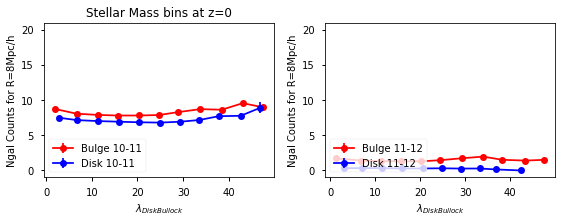

In [21]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.errorbar(bulgedom_cen_DSage['slambda_Ngalcounts_meanbin_z0_SM10_11'][0],
             bulgedom_cen_DSage['slambda_Ngalcounts_meanbin_z0_SM10_11'][1],
            yerr=bulgedom_cen_DSage['slambda_Ngalcounts_stdbin_z0_SM10_11'][1],
            marker='o', color='r', label='Bulge 10-11')

plt.errorbar(diskdom_cen_DSage['slambda_Ngalcounts_meanbin_z0_SM10_11'][0],
             diskdom_cen_DSage['slambda_Ngalcounts_meanbin_z0_SM10_11'][1],
            yerr=diskdom_cen_DSage['slambda_Ngalcounts_stdbin_z0_SM10_11'][1],
            marker='o', color='b', label='Disk 10-11')

plt.title('Stellar Mass bins at z=0')
#plt.xlim(0, 1)
plt.ylim(-1, 21)
plt.xlabel('$\lambda_{Disk Bullock}$',  fontsize=10)
plt.ylabel('Ngal Counts for R=8Mpc/h',  fontsize=10)
#plt.title('Central Galaxies Mvir vs. Stellar Mass ')
plt.legend(loc=3, numpoints=1)
#plt.axis([1e11, 1e15, 1e9, 1e12])

plt.subplot(222)
plt.errorbar(bulgedom_cen_DSage['slambda_Ngalcounts_meanbin_z0_SM11_12'][0],
             bulgedom_cen_DSage['slambda_Ngalcounts_meanbin_z0_SM11_12'][1],
            yerr=bulgedom_cen_DSage['slambda_Ngalcounts_stdbin_z0_SM11_12'][1],
            marker='o', color='r', label='Bulge 11-12')

plt.errorbar(diskdom_cen_DSage['slambda_Ngalcounts_meanbin_z0_SM11_12'][0],
             diskdom_cen_DSage['slambda_Ngalcounts_meanbin_z0_SM11_12'][1],
            yerr=diskdom_cen_DSage['slambda_Ngalcounts_stdbin_z0_SM11_12'][1],
            marker='o', color='b', label='Disk 11-12')


#plt.xlim(0, 1)
plt.ylim(-1, 21)
plt.xlabel('$\lambda_{Disk Bullock}$',  fontsize=10)
plt.ylabel('Ngal Counts for R=8Mpc/h',  fontsize=10)
#plt.title('Central Galaxies Mvir vs. Stellar Mass ')
plt.legend(loc=3, numpoints=1)
#plt.axis([1e11, 1e15, 1e9, 1e12])


plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')

plt.tight_layout()
#plt.savefig('morphdensity_Centrals_stellarSpin_lambdavsRvir_SMbin10-12_DSAGE_z0.png', dpi=100)

plt.show()

In [25]:
n1 = 0
n2 = 0
m1 = 0
m2 = 0
Mvir_bins = np.logspace(10, 12, 12)

for n1 in range(len(bulge_gal_cen_DSage)):
    for n2 in range(4):
        n2 = n2 + 8
        bulgedom_cen_DSage['TSM_Ngalcounts_meanbin_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)] = meanbin(bulgedom_cen_DSage['TSM_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)], bulgedom_cen_DSage['ngal_arr_10_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)])
        bulgedom_cen_DSage['TSM_Ngalcounts_stdbin_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)] = stdbin(bulgedom_cen_DSage['TSM_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)], bulgedom_cen_DSage['ngal_arr_10_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)])
        

        

for m1 in range(len(disk_gal_cen_DSage)):
    for m2 in range(4):
        m2 = m2 + 8
        diskdom_cen_DSage['TSM_Ngalcounts_meanbin_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)] = meanbin(diskdom_cen_DSage['TSM_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)], diskdom_cen_DSage['ngal_arr_10_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)])
        diskdom_cen_DSage['TSM_Ngalcounts_stdbin_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)] = stdbin(diskdom_cen_DSage['TSM_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)], diskdom_cen_DSage['ngal_arr_10_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)])


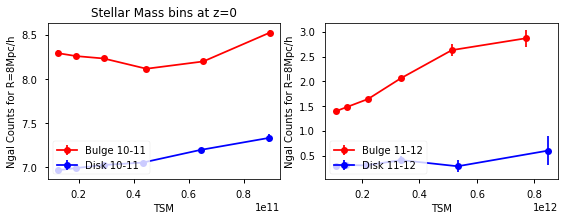

In [26]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.errorbar(bulgedom_cen_DSage['TSM_Ngalcounts_meanbin_z0_SM10_11'][0],
             bulgedom_cen_DSage['TSM_Ngalcounts_meanbin_z0_SM10_11'][1],
            yerr=bulgedom_cen_DSage['TSM_Ngalcounts_stdbin_z0_SM10_11'][1],
            marker='o', color='r', label='Bulge 10-11')

plt.errorbar(diskdom_cen_DSage['TSM_Ngalcounts_meanbin_z0_SM10_11'][0],
             diskdom_cen_DSage['TSM_Ngalcounts_meanbin_z0_SM10_11'][1],
            yerr=diskdom_cen_DSage['TSM_Ngalcounts_stdbin_z0_SM10_11'][1],
            marker='o', color='b', label='Disk 10-11')

plt.title('Stellar Mass bins at z=0')
#plt.xlim(0, 1)
#plt.ylim(-1, 21)
plt.xlabel('TSM',  fontsize=10)
plt.ylabel('Ngal Counts for R=8Mpc/h',  fontsize=10)
#plt.title('Central Galaxies Mvir vs. Stellar Mass ')
plt.legend(loc=3, numpoints=1)
#plt.axis([1e11, 1e15, 1e9, 1e12])

plt.subplot(222)
plt.errorbar(bulgedom_cen_DSage['TSM_Ngalcounts_meanbin_z0_SM11_12'][0],
             bulgedom_cen_DSage['TSM_Ngalcounts_meanbin_z0_SM11_12'][1],
            yerr=bulgedom_cen_DSage['TSM_Ngalcounts_stdbin_z0_SM11_12'][1],
            marker='o', color='r', label='Bulge 11-12')

plt.errorbar(diskdom_cen_DSage['TSM_Ngalcounts_meanbin_z0_SM11_12'][0],
             diskdom_cen_DSage['TSM_Ngalcounts_meanbin_z0_SM11_12'][1],
            yerr=diskdom_cen_DSage['TSM_Ngalcounts_stdbin_z0_SM11_12'][1],
            marker='o', color='b', label='Disk 11-12')


#plt.xlim(0, 1)
#plt.ylim(-1, 21)
plt.xlabel('TSM',  fontsize=10)
plt.ylabel('Ngal Counts for R=8Mpc/h',  fontsize=10)
#plt.title('Central Galaxies Mvir vs. Stellar Mass ')
plt.legend(loc=3, numpoints=1)
#plt.axis([1e11, 1e15, 1e9, 1e12])


plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')

plt.tight_layout()
#plt.savefig('morphdensity_Centrals_stellarSpin_lambdavsRvir_SMbin10-12_DSAGE_z0.png', dpi=100)

plt.show()

# Halo lambda

In [22]:
i = 0
j = 0
for i in range(len(bulge_gal_cen_DSage)):
    for j in range(4):
        j = j + 8       
        bulgedom_cen_DSage["hlambda_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgedom_cen_DSage["haloJ_z{0}_SM{1}_{2}".format(i,j,j+1)]/(np.sqrt(2)*bulgedom_cen_DSage["Vvir_z{0}_SM{1}_{2}".format(i,j,j+1)]*
                                                                bulgedom_cen_DSage["Rvir_z{0}_SM{1}_{2}".format(i,j,j+1)])


n1 = 0
n2 = 0
for n1 in range(len(disk_gal_cen_DSage)):
    for n2 in range(4):
        n2 = n2 + 8
        diskdom_cen_DSage["hlambda_z{0}_SM{1}_{2}".format(n1,n2,n2+1)] = diskdom_cen_DSage["haloJ_z{0}_SM{1}_{2}".format(n1,n2,n2+1)]/(np.sqrt(2)*diskdom_cen_DSage["Vvir_z{0}_SM{1}_{2}".format(n1,n2,n2+1)]*
                                                                diskdom_cen_DSage["Rvir_z{0}_SM{1}_{2}".format(n1,n2,n2+1)])

 

In [23]:
Mvir_bins = np.linspace(0, 0.175, 10)
n1 = 0
n2 = 0
m1 = 0
m2 = 0

for n1 in range(len(bulge_gal_cen_DSage)):
    for n2 in range(4):
        n2 = n2 + 8
        bulgedom_cen_DSage['hlambda_Ngalcounts_meanbin_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)] = meanbin(bulgedom_cen_DSage['hlambda_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)], bulgedom_cen_DSage['ngal_arr_10_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)])
        bulgedom_cen_DSage['hlambda_Ngalcounts_stdbin_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)] = stdbin(bulgedom_cen_DSage['hlambda_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)], bulgedom_cen_DSage['ngal_arr_10_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)])
        

        

for m1 in range(len(disk_gal_cen_DSage)):
    for m2 in range(4):
        m2 = m2 + 8
        diskdom_cen_DSage['hlambda_Ngalcounts_meanbin_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)] = meanbin(diskdom_cen_DSage['hlambda_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)], diskdom_cen_DSage['ngal_arr_10_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)])
        diskdom_cen_DSage['hlambda_Ngalcounts_stdbin_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)] = stdbin(diskdom_cen_DSage['hlambda_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)], diskdom_cen_DSage['ngal_arr_10_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)])



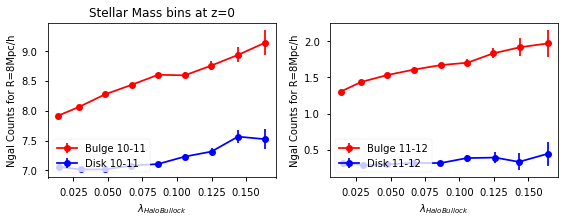

In [24]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.errorbar(bulgedom_cen_DSage['hlambda_Ngalcounts_meanbin_z0_SM10_11'][0],
             bulgedom_cen_DSage['hlambda_Ngalcounts_meanbin_z0_SM10_11'][1],
            yerr=bulgedom_cen_DSage['hlambda_Ngalcounts_stdbin_z0_SM10_11'][1],
            marker='o', color='r', label='Bulge 10-11')

plt.errorbar(diskdom_cen_DSage['hlambda_Ngalcounts_meanbin_z0_SM10_11'][0],
             diskdom_cen_DSage['hlambda_Ngalcounts_meanbin_z0_SM10_11'][1],
            yerr=diskdom_cen_DSage['hlambda_Ngalcounts_stdbin_z0_SM10_11'][1],
            marker='o', color='b', label='Disk 10-11')

plt.title('Stellar Mass bins at z=0')
#plt.xlim(0, 1)
#plt.ylim(12, 22)
plt.xlabel('$\lambda_{Halo Bullock}$',  fontsize=10)
plt.ylabel('Ngal Counts for R=8Mpc/h',  fontsize=10)
#plt.title('Central Galaxies Mvir vs. Stellar Mass ')
plt.legend(loc=3, numpoints=1)
#plt.axis([1e11, 1e15, 1e9, 1e12])

plt.subplot(222)
plt.errorbar(bulgedom_cen_DSage['hlambda_Ngalcounts_meanbin_z0_SM11_12'][0],
             bulgedom_cen_DSage['hlambda_Ngalcounts_meanbin_z0_SM11_12'][1],
            yerr=bulgedom_cen_DSage['hlambda_Ngalcounts_stdbin_z0_SM11_12'][1],
            marker='o', color='r', label='Bulge 11-12')

plt.errorbar(diskdom_cen_DSage['hlambda_Ngalcounts_meanbin_z0_SM11_12'][0],
             diskdom_cen_DSage['hlambda_Ngalcounts_meanbin_z0_SM11_12'][1],
            yerr=diskdom_cen_DSage['hlambda_Ngalcounts_stdbin_z0_SM11_12'][1],
            marker='o', color='b', label='Disk 11-12')


#plt.xlim(0, 1)
#plt.ylim(12, 22)
plt.xlabel('$\lambda_{Halo Bullock}$',  fontsize=10)
plt.ylabel('Ngal Counts for R=8Mpc/h',  fontsize=10)
#plt.title('Central Galaxies Mvir vs. Stellar Mass ')
plt.legend(loc=3, numpoints=1)
#plt.axis([1e11, 1e15, 1e9, 1e12])


plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')

plt.tight_layout()
#plt.savefig('morphdensity_Centrals_haloSpin_lambdavsRvir_SMbin10-12_DSAGE_z0.png', dpi=100)

plt.show()

In [6]:
####this was designed to count how many galaxies are in a radius R[Mpc/h]

allgal_cen_DSage = [gal_cen_z0DSage, gal_cen_z1DSage, gal_cen_z2DSage, gal_cen_z3DSage]
gal_cen_DSage = {}
i=0

for i in range(len(alldata_cen_DSage)):
    gal_cen_DSage["points_z{0}".format(i)] = np.array(zip(allgal_cen_DSage[i]['X'].ravel(),
                                                     allgal_cen_DSage[i]['Y'].ravel(),
                                                     allgal_cen_DSage[i]['Z'].ravel()))
    
    gal_cen_DSage["tree_z{0}".format(i)] = sp.cKDTree(gal_cen_DSage["points_z{0}".format(i)])

    gal_cen_DSage["ck_arr_10_z{0}".format(i)] = gal_cen_DSage["tree_z{0}".format(i)].query_ball_point(gal_cen_DSage["points_z{0}".format(i)], 8)

    ii=0
    gal_cen_DSage["ngal_arr_10_z{0}".format(i)] = np.array([len(gal_cen_DSage["ck_arr_10_z{0}".format(i)][ii])-1 for ii in range(len(gal_cen_DSage["ck_arr_10_z{0}".format(i)]))]).astype(float)


  

In [11]:
#####THis let's me add columns to an existing fits file and writes it in a new fits file
"""
cols = [] 
cols.append(
    fits.Column(name='Ngal_counts_R8', format='D', array= gal_cen_DSage['ngal_arr_10_z3'])
    )
orig_cols = gal_cen_z3DSage.columns
new_cols = fits.ColDefs(cols)
hdu = fits.BinTableHDU.from_columns(orig_cols + new_cols)
hdu.writeto('edited_tao.1957.0.fits')

"""

ColDefs(
    name = 'Total_Stellar_Mass'; format = 'D'; unit = 'unitless'
    name = 'Disk_Stellar_Mass'; format = 'D'; unit = 'unitless'
    name = 'Merger-driven_Bulge_Mass'; format = 'D'; unit = 'unitless'
    name = 'Instability-driven_Bulge_Mass'; format = 'D'; unit = 'unitless'
    name = 'Pseudobulge_Mass'; format = 'D'; unit = 'unitless'
    name = 'Black_Hole_Mass'; format = 'D'; unit = 'unitless'
    name = 'Cold_Gas_Mass'; format = 'D'; unit = 'unitless'
    name = 'HI_Mass'; format = 'D'; unit = 'unitless'
    name = 'H2_Mass'; format = 'D'; unit = 'unitless'
    name = 'Hot_Gas_Mass'; format = 'D'; unit = 'unitless'
    name = 'Ejected_Gas_Mass'; format = 'D'; unit = 'unitless'
    name = 'Intracluster_Stars_Mass'; format = 'D'; unit = 'unitless'
    name = 'Metals_Total_Stellar_Mass'; format = 'D'; unit = 'unitless'
    name = 'Metals_Stellar_Disk_Mass'; format = 'D'; unit = 'unitless'
    name = 'Metals_Merger_Bulge_Mass'; format = 'D'; unit = 'unitless'
    name = 'Meta

In [9]:
len(gal_sat_z0DSage['Total_Stellar_Mass'])

131349

In [5]:
print data['X']

[  7.54921389   7.50702858  10.77274799 ...,  77.20855713  72.68579102
  67.36805725]


In [ ]:

"""

        bulgedom_cen_DSage["points_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.array(zip(bulgedom_cen_DSage["xpos_z{0}_SM{1}_{2}".format(i,j,j+1)].ravel(), 
                                                                           bulgedom_cen_DSage["ypos_z{0}_SM{1}_{2}".format(i,j,j+1)].ravel(), 
                                                                           bulgedom_cen_DSage["zpos_z{0}_SM{1}_{2}".format(i,j,j+1)].ravel()))
        
        bulgedom_cen_DSage["tree_z{0}_SM{1}_{2}".format(i,j,j+1)] = sp.cKDTree(bulgedom_cen_DSage["points_z{0}_SM{1}_{2}".format(i,j,j+1)])


        bulgedom_cen_DSage["ck_arr_10_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgedom_cen_DSage["tree_z{0}_SM{1}_{2}".format(i,j,j+1)].query_ball_point(bulgedom_cen_DSage["points_z{0}_SM{1}_{2}".format(i,j,j+1)], 8)

        ii=0
        bulgedom_cen_DSage["ngal_arr_10_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.array([len(bulgedom_cen_DSage["ck_arr_10_z{0}_SM{1}_{2}".format(i,j,j+1)][ii])-1 for ii in range(len(bulgedom_cen_DSage["ck_arr_10_z{0}_SM{1}_{2}".format(i,j,j+1)]))]).astype(float)

"""